save sucess
[[ 0.30429609 -1.8276205 ]
 [ 4.40925493  7.54885022]
 [ 0.79007404  1.52168006]
 [10.01866701  1.0034449 ]
 [ 5.21366762  4.2890353 ]]
(5, 2)
(90, 2)


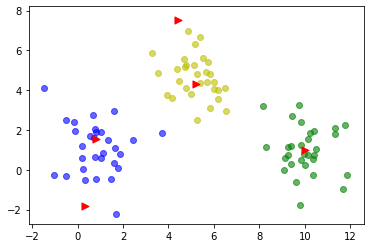

In [1]:
from numpy import *
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
# generate data
def makeDataSet(k=3):
    datMat = ones([90, 2])
    x_mean = [1, 5, 10]
    y_mean = [1, 5, 1]
    x_value =[]
    y_value = []
    for meanX in x_mean:
        x = random.normal(meanX, 1, [30,1])
        x_value.extend(x)
    for meanY in y_mean:
        y = random.normal(meanY, 1, [30,1])
        y_value.extend(y)
    for i in range(90):
        datMat[i, 0] = x_value[i]
        datMat[i, 1] = y_value[i]

    datMat = array(datMat)
    savetxt('data.txt', datMat)
    print('save sucess')

# 计算欧几里得距离
def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2)))  # 求两个向量之间的距离


# 构建聚簇中心，取k个(此例中为4)随机质心
def randCent(dataSet, k):
    n = shape(dataSet)[1] # (90, 2)

    centroids = mat(zeros((k, n)))   # 每个质心有n个坐标值，总共要k个质心
    for j in range(n):
        minJ = min(dataSet[:, j])
        maxJ = max(dataSet[:, j])
        rangeJ = float(maxJ - minJ)
        centroids[:, j] = minJ + rangeJ * random.rand(k, 1)
    return centroids


# k-means 聚类算法
def RPCL(dataSet, k, dist_func=distEclud, createCent=randCent, lr=1, penalty=0.5):
    m = shape(dataSet)[0]
    dist_to_mu = mat(zeros((m,2)))    # 用于存放该样本属于哪类及质心距离
    # dist_to_mu第一列存放该数据所属的cluster index，第二列是该数据到中心点的距离, 第三列是该数据第二接近的cluster index
    centroids = createCent(dataSet, k)
    clusterChanged = True   # 用来判断聚类是否已经收敛,false为收敛
    while clusterChanged:
        clusterChanged = False
        for i in range(m):  # 把每一个数据点划分到离它最近的中心点
            minDist = inf  # 最小
            minIndex = -1
            for j in range(k):
                distJI = dist_func(centroids[j, :], dataSet[i, :])  # 算第i个数据点到第k个聚类中心的距离
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j  # 如果第i个数据点到第j个中心点更近，则将i归属为j
            if dist_to_mu[i, 0] != minIndex : clusterChanged = True;  # 如果分配发生变化，则需要继续迭代
            dist_to_mu[i, :] = minIndex, minDist**2  # 并将第i个数据点的分配情况存入字典
        # print(centroids)
        for cent in range(k):   # 重新计算中心点
            # penalize the reval
            secDist = inf  # 第二小
            secIndex = -1
            for i in range(k):
                if i != cent:
                    dist = dist_func(centroids[cent, :], centroids[i, :])
                    if dist < secDist:
                        secDist = dist
                        secIndex = i


            ptsInClust = dataSet[nonzero(dist_to_mu[:, 0] == cent)[0]]   # points in cluster
            # for i in range(m):
            #     if(dataSet[i, 0] == cent):
            
            centroids[cent, :] = centroids[cent, :] + lr * (mean(ptsInClust, axis=0) - centroids[cent, :])  # 算出这些数据的中心点
            centroids[secIndex, :] = centroids[secIndex, :] - lr * penalty * (mean(ptsInClust, axis=0) - centroids[secIndex, :])


    return centroids, dist_to_mu
# --------------------测试----------------------------------------------------
# 用测试数据及测试RPCL算法
makeDataSet()
datMat = genfromtxt(fname='data.txt',
                            dtype=float)

myCentroids, dist_to_mu = RPCL(datMat, 5)
print(myCentroids)
print(shape(myCentroids))
# print(dist_to_mu)
print(shape(dist_to_mu))


mu_x = [0, 0, 0, 0, 0]
mu_y = [0, 0, 0, 0, 0]
color = ['b', 'y', 'g']
for i in range(5):
    mu_x[i] = myCentroids[i, 0]
    mu_y[i] = myCentroids[i, 1]
for i in range(3):
    plt.scatter(datMat[i*30:i*30+30, 0], datMat[i*30:i*30+30:, 1], c=color[i], alpha=0.6)

plt.scatter(mu_x, mu_y, c='r', marker='>', s=50)
plt.show()

Automatically created module for IPython interactive environment


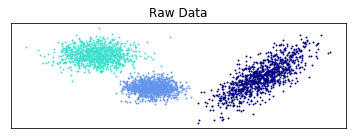

In [7]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

print(__doc__)

# # Dataset 1 N=500, d=2, c=2
# # Number of samples per component
# n_samples = 500

# # Generate random sample, two components
# np.random.seed(0)
# C = np.array([[0.5, -0.1], [.7, 1.4]])
# X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
#           .7 * np.random.randn(n_samples, 2) + np.array([-1.5, 2])]

# # Dataset 2 N=1000, d=2, c=2
# # Number of samples per component
# n_samples = 1000

# # Generate random sample, two components
# np.random.seed(0)
# C = np.array([[0.5, -0.1], [.7, 1.4]])
# X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
#           .7 * np.random.randn(n_samples, 2) + np.array([-1.5, 2])]

# # Dataset 3 N=1000, d=2, c=3
# Number of samples per component
n_samples = 1000

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0.5, -0.1], [.7, 1.4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 2]),
         .5 * np.random.randn(n_samples, 2) + np.array([-4, -1])]

# # # Dataset 4: N=500, d=10, c=2
# # # Generate random sample, two components
# n_samples = 500
# np.random.seed(0)
# # C=np.array([[1,1],[2,2],[3,3],[4,4],[5,5],[6,6],[7,7],[8,8],[9,9],[10,10]])
# X = np.r_[
#           .7 * np.random.randn(n_samples, 10) + np.array([-6, 3, 3, 3, 3, 3, 3, 3, 3, 3]),
#           .5 * np.random.randn(n_samples, 10) + np.array([-13, 1, 1, 1, 1, 1, 1, 1, 13, 13])]

lowest_bic = np.infty
lowest_aic = np.infty
bic = []
aic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        aic.append(gmm.aic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
#         if aic[-1] < lowest_aic:
#             lowest_aic = aic[-1]
#             best_gmm = gmm

bic = np.array(bic)
aic = np.array(aic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# # Plot the AIC scores
# plt.figure(figsize=(8, 6))
# spl = plt.subplot(2, 1, 1)
# for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
#     xpos = np.array(n_components_range) + .2 * (i - 2)
#     bars.append(plt.bar(xpos, bic[i * len(n_components_range):
#                                   (i + 1) * len(n_components_range)],
#                         width=.2, color=color))
# plt.xticks(n_components_range)
# plt.ylim([aic.min() * 1.01 - .01 * aic.max(), aic.max()])
# plt.title('AIC score per model')
# xpos = np.mod(aic.argmin(), len(n_components_range)) + .65 +\
#     .2 * np.floor(aic.argmin() / len(n_components_range))
# plt.text(xpos, aic.min() * 0.97 + .03 * aic.max(), '*', fontsize=14)
# spl.set_xlabel('Number of components')
# spl.legend([b[0] for b in bars], cv_types)

# # Plot the BIC scores
# plt.figure(figsize=(8, 6))
# spl = plt.subplot(2, 1, 1)
# for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
#     xpos = np.array(n_components_range) + .2 * (i - 2)
#     bars.append(plt.bar(xpos, bic[i * len(n_components_range):
#                                   (i + 1) * len(n_components_range)],
#                         width=.2, color=color))
# plt.xticks(n_components_range)
# plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
# plt.title('BIC score per model')
# xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
#     .2 * np.floor(bic.argmin() / len(n_components_range))
# plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
# spl.set_xlabel('Number of components')
# spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

#     # Plot an ellipse to show the Gaussian component
#     angle = np.arctan2(w[0][1], w[0][0])
#     angle = 180. * angle / np.pi  # convert to degrees
#     v = 2. * np.sqrt(2.) * np.sqrt(v)
#     ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
#     ell.set_clip_box(splot.bbox)
#     ell.set_alpha(.5)
#     splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title('Raw Data')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.savefig("raw.pdf")

Automatically created module for IPython interactive environment


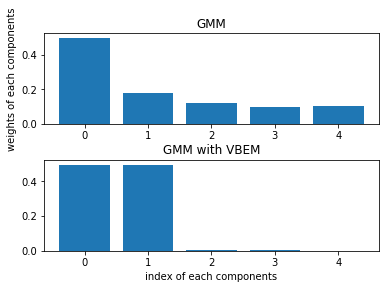

In [49]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

print(__doc__)

# Number of samples per component

# # Dataset 1 N=500, d=2, c=2
# # Number of samples per component
# n_samples = 500

# # Generate random sample, two components
# np.random.seed(0)
# C = np.array([[0.5, -0.1], [.7, 1.4]])
# X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
#           .7 * np.random.randn(n_samples, 2) + np.array([-6, 2])]

# # Dataset 2 N=1000, d=2, c=2
# # Number of samples per component
# n_samples = 1000

# # Generate random sample, two components
# np.random.seed(0)
# C = np.array([[0.5, -0.1], [.7, 1.4]])
# X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
#           .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

# # # Dataset 3 N=1000, d=2, c=3
# # # Number of samples per component
# # n_samples = 1000

# # Generate random sample, two components
# np.random.seed(0)
# C = np.array([[0.5, -0.1], [.7, 1.4]])
# X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
#           .7 * np.random.randn(n_samples, 2) + np.array([-6, 2]),
#          .5 * np.random.randn(n_samples, 2) + np.array([-4, -1])]

# # Dataset 4: N=500, d=10, c=2
# # Generate random sample, two components
n_samples = 500
np.random.seed(0)
# C=np.array([[1,1],[2,2],[3,3],[4,4],[5,5],[6,6],[7,7],[8,8],[9,9],[10,10]])
X = np.r_[
          .7 * np.random.randn(n_samples, 10) + np.array([-6, 3, 3, 3, 3, 3, 3, 3, 3, 3]),
          .5 * np.random.randn(n_samples, 10) + np.array([-13, 1, 1, 1, 1, 1, 1, 1, 13, 13])]
############################################################################
def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 3.8, color=color, alpha=0.3)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-9., 5.)
    plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
def plot_bars(model, n_components, index, model_name):
  plt.subplot(2, 1, index)
  plt.bar(range(n_components), model.weights_)
  if index == 2:
    plt.xlabel('index of each components')
  if index == 1:
    plt.ylabel('weights of each components')
  plt.title(str(model_name))



n_components = 5
color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])

cv_types = ['spherical', 'tied', 'diag', 'full']

    
        # Fit a Gaussian mixture with EM
vGMM = mixture.BayesianGaussianMixture(n_components=n_components,
                                      covariance_type='full')
vGMM.fit(X)

gmm = mixture.GaussianMixture(n_components=n_components, covariance_type='full').fit(X)
# plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,
#              'Gaussian Mixture')

# plot_results(X, vGMM.predict(X), vGMM.means_, vGMM.covariances_, 1,
#              'Bayesian Gaussian Mixture with a Dirichlet process prior')
# plt.show()
plt.subplots_adjust(hspace=0.4)
plot_bars(model=gmm, n_components=n_components, index=1, model_name='GMM')
plot_bars(model=vGMM, n_components=n_components, index=2, model_name="GMM with VBEM")
plt.savefig("VBEM_4.pdf")